In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

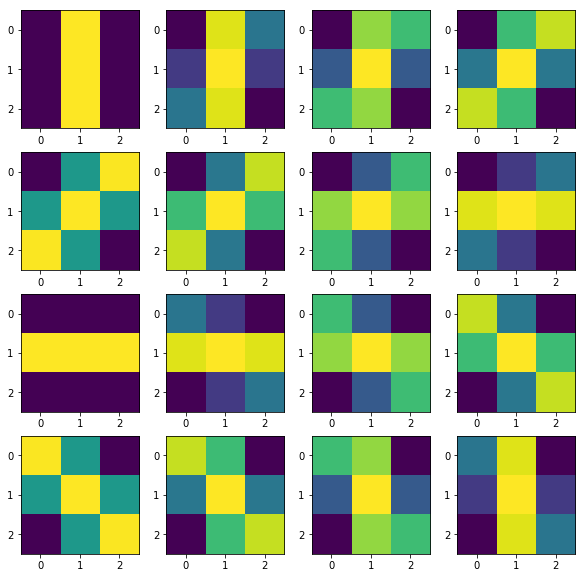

In [47]:
%matplotlib inline

gabor_filters = []
for theta in np.arange(0, np.pi, np.pi / 16):
    gabor_filters.append(cv.getGaborKernel((3,3), 5, theta, 3, 0.5, 0, ktype=cv.CV_32F))

_, ax = plt.subplots(4,4, figsize=(10,10))

i = 0 
for r in range(4):
    for c in range(4):
        ax[r,c].imshow(gabor_filters[i])
        i += 1

In [14]:
from ProjectPaths import ProjectPaths
from Datasets import Datasets


ProjectPaths.instance(r"/home/tdjg/Documents/DeepSolaris")
ac_dataset = Datasets.datasets()["AcMüDüHo"]
train = ac_dataset[0].images

In [15]:
positives = train[ac_dataset[0].labels == 1]

In [27]:
def normalize_image(image):
    return (image - image.min(axis=(0,1))) / (image.max(axis=(0,1)) - image.min(axis=(0,1)))

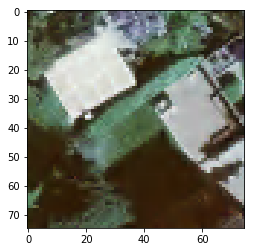

In [54]:
plt.imshow(positives[4])

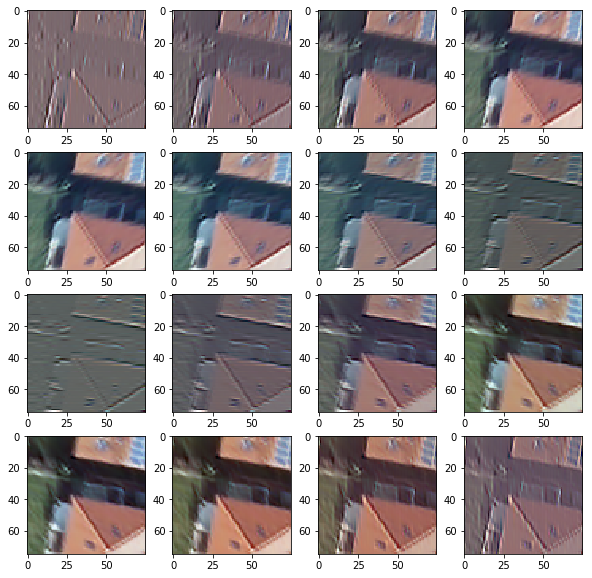

In [57]:
positive = positives[6].astype(np.float32)
filteredImages = [cv.filter2D(positive, cv.CV_32F, gabor_filter) for gabor_filter in gabor_filters]

_, ax = plt.subplots(4, 4, figsize=(10,10))

i = 0
for r in range(4):
    for c in range(4):
        ax[r,c].imshow(normalize_image(filteredImages[i])[:,:,::-1])
        i += 1
